In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import baltic as bt

tre1 = bt.loadNewick("data/tree.nwk")
tre1.treeStats()

nn = {}

for o in tre1.Objects:
    if o.branchType!='leaf':
        if o==tre1.root:
            o.name = "root"
        else:
            o.name = "ab"
    print(f"{o.name}: ({o.x},{o.y})")

    nn[o.name] = o


Tree height: 5.000000
Tree length: 11.000000
strictly bifurcating tree
annotations present

Numbers of objects in tree: 5 (2 nodes and 3 leaves)

root: (0.0,1.75)
ab: (3.0,1.0)
B: (5.0,1.5)
A: (4.0,0.5)
C: (5.0,2.5)


In [2]:
def base_fig(ax, tre, label=True, color=True, points=True, plot=True):
    tre.drawTree(order=[nn["A"], nn["B"], nn["C"]])
    if plot:
        tre.plotTree(ax, x_attr=lambda k: k.x, colour=lambda k: 'k')
    if points:
        tre.plotPoints(ax,
                    target=lambda k: k.branchType=="leaf", # turn off internal node colors
                    size=50,
                    colour=lambda k: 'k',
                    )
        if color:
            tre.plotPoints(ax,
                        target=lambda k: k.branchType=="leaf", # turn off internal node colors
                        size=40,
                        colour=lambda k: 'steelblue' if k.name=="C" else "indianred",
                        )
    if label:
        tre.addText(ax, 
                    target=lambda k: k.branchType=="leaf", # turn off internal node labels
                    x_attr=lambda k: k.x+.2,
                    y_attr=lambda k: k.y-.05,
                    fontsize=20)
    ax.axis('off')

    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(0,3)

    return ax, tre

In [3]:
tre1

/var/folders/9n/v2y56hkx127fvfrtvpfxnyk80000gn/T/ipykernel_55369/1918330583.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


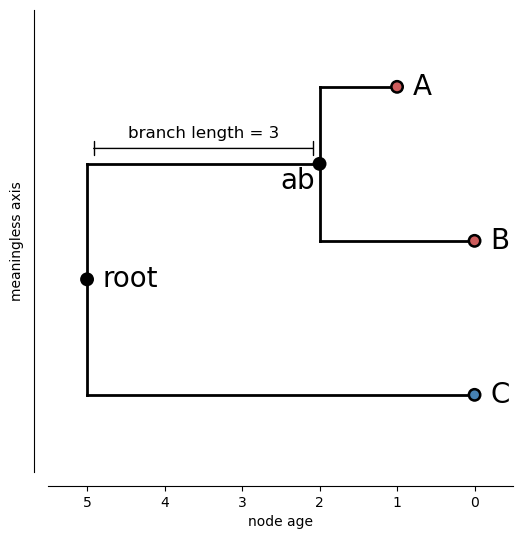

In [4]:
# labeled phylogeny
fig, ax = plt.subplots(figsize=(6,6))
ax, tre1 = base_fig(ax, tre1)

tre1.plotPoints(ax,
               target=lambda k: not k.branchType=="leaf",
               size=50)
tre1.addText(ax,
            target=lambda k: k.name=="ab",
            x_attr=lambda k: k.x-.5,
            y_attr=lambda k: k.y-.16,
            fontsize=20)
tre1.addText(ax,
            target=lambda k: k.name=="root",
            x_attr=lambda k: k.x+.2,
            y_attr=lambda k: k.y-.05,
            fontsize=20)

ax.axis("on")
labels = [ str(i) for i in range(6,-1,-1)]
ax.set_xticklabels(labels)
ax.set_xlabel("node age")
ax.set_ylabel("meaningless axis")
ax.set_yticklabels([])
ax.set_yticks([])
[ax.spines[loc].set_visible(False) for loc in ['top','right']]
sns.despine(ax=ax, trim=False, offset=10)

ax.annotate('', xy=(0.05, 2.1), xytext=(2.95, 2.1), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|'}, fontsize=5)
ax.annotate('branch length = 3', xy=(1.5, 2.2), ha='center', va='center',fontsize=12)

plt.savefig("../chapters/introduction/image/treeDiagram.png")
